# Worked with Beck and Hannah

# Import Packages

In [42]:
# Allows us to use various mathermatical functions
import numpy as np
#Allows us to plot functions and simulations
import matplotlib.pyplot as plt
#Allows us to define units precisely
from astropy import units as u
#Imports math functions
import math
#Allows us to define constants precisely
from astropy import constants as const
import scipy

In [360]:
### --- NOTE I use Lambda on accident instead of gamma but it is consistant throughout. 
### When I name things as lambda I mean gamma !!! ---

# Define Constants

In [43]:
#q from: Brooks, A , Physical constants, https://www.physics.rutgers.edu/~abrooks/342/constants.html
# , Accessed Nov 18, 2022)
#q = const.e.esu.value
q = 4.8032 * 10 **(-10) # cm^3/2 g^1/2 s-1
c = 2.99792458 * 10**(10)# cm s-1


# Make Function

In [473]:
# -- First attempt at making them together but I couldnt plot the parallel and perp together --
def beam(Lambda, Phi, Theta):
    #A = (q**2 * (1)**2)/(4 * np.pi * c**3) ##Make a'^2 == 1 so that it can be constant
    
## --- With the constant gave very large numbers, so not using ---
#     parallel = (A * np.sin(Theta)**2 ) / (Lambda**2 * (1 - (v/c) * np.cos(Theta))**2)
#     perp = A * (1/(1-(v/c) * np.cos(Theta))**4) * (1 - (np.sin(Theta)**2 * np.cos(Phi)**2)
#                                                    / (Lambda**2 * (1-(v/c) * np.cos(Theta))**2))
    
## --- I am assuming that A=1 in this one ---  
## -- Make a beta function because the functions 
    Beta = np.sqrt(1 - (1/(Lambda**2))) # Where you solve for Beta = v/c
    
    parallel = ((np.sin(Theta))**2 ) / (Lambda**2 * (1 - (Beta) * np.cos(Theta))**2)
    perp = (1/(1 - (Beta) * np.cos(Theta))**4) * (1 - ((np.sin(Theta))**2 * (np.cos(Phi))**2)
                                                   / (Lambda**2 * (1-(Beta) * np.cos(Theta))**2))
    
    return(parallel, perp)                    

In [474]:
## -- Test ---

# perp = A * (1/(1-(v/c) * np.cos(Theta))**4) * (1 - (np.sin(Theta)**2 * np.cos(Phi)**2) / (Lambda**2 * (1-(v/c) * np.cos(Theta))**2))
# print(perp)
# A = (q**2)/(4 * np.pi * c**3)
# print(A)

# parallel = (A * np.sin(Theta)**2 ) / (Lambda**2 * (1 - (v/c) * np.cos(Theta))**2)
# print(parallel)
# Theta= 90
# print(A * np.sin(Theta)**2)


# Make Function With Different Lambda's and Theta's

In [556]:
## -- Make array for the lambdas that we have to use --
lambda_range = [5,10,100]

## -- Make array for the ranges of theta that we use --
# theta_range  = [-180 ,-90, -45, -30, -15, -10, 0, 5, 10, 15, 30, 45, 90, 180]
theta_list  = np.linspace(0,2*(np.pi), 10000)

## -- Define function to plot with our beam function and the arrays we just made --
def plot(lambda_range, theta_list):
    beam_para_5 = beam(lambda_range[0],0,theta_list)[0]
    beam_perp_5 = beam(lambda_range[0],0,theta_list)[1]
    
    beam_para_10 = beam(lambda_range[1],0,theta_list)[0]
    beam_perp_10 = beam(lambda_range[1],0,theta_list)[1]
    
    beam_para_100 = beam(lambda_range[2],0,theta_list)[0]
    beam_perp_100 = beam(lambda_range[2],0,theta_list)[1]
    
    return(beam_para_5, beam_perp_5, beam_para_10, beam_perp_10, beam_para_100, beam_perp_100)

## -- Create variable for the result of the plotting function --
result = plot(lambda_range, theta_list)      
  
## -- Print the beam_para_5 to check --
# print('This is Beam Para 100=',result[0])
    

# Plot the Plotting Function

## Plot Lambda = 5, Beam Parallel and Perpendicular

/var/folders/hb/2k3dc2q970j6kglh41009phr0000gn/T/ipykernel_29027/2175371253.py:25: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('Lambda = 5, Beam.pdf', bbox='tight')


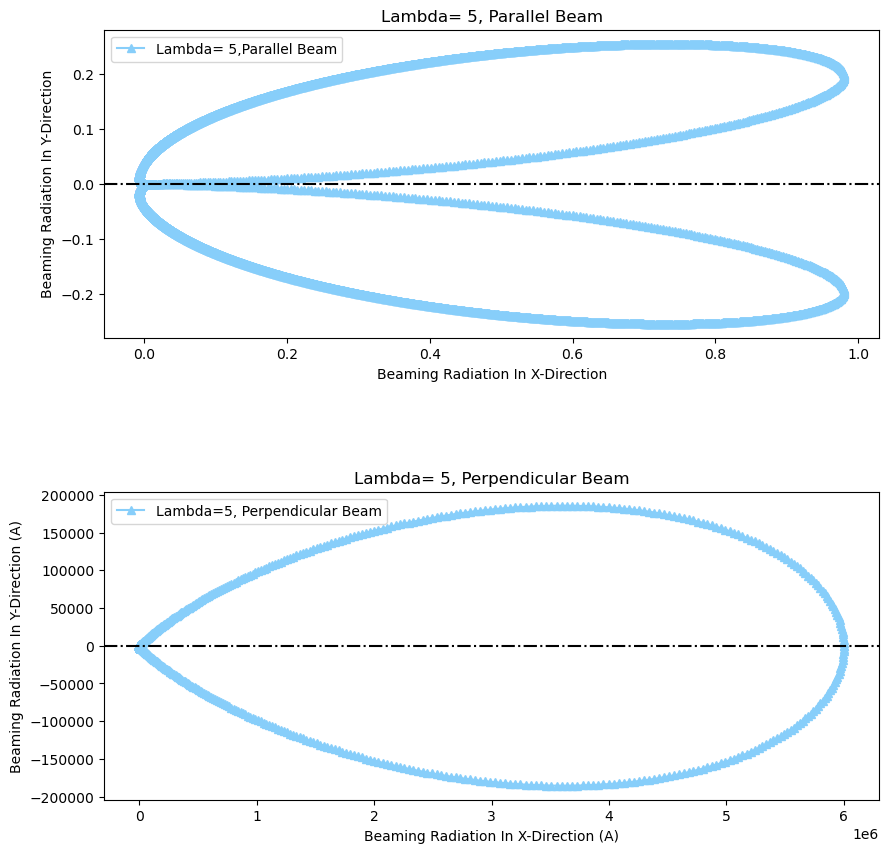

In [567]:
# -- Set up subplots to plot both at the same time-- 
fig = plt.figure(figsize=(10, 10))
gs = fig.add_gridspec(2,1, hspace=0.5)
axs = gs.subplots(sharex=False, sharey=False)

#--Plot in the Grids --
## -- Parallel beam plotting
### -- Take the 0th component of the result variable that is the parallel beam of lambda 
axs[0].plot(np.cos(theta_list)*result[0], np.sin(theta_list)*result[0], marker="^", ls='-', c= 'lightskyblue', label='Lambda= 5,Parallel Beam')
axs[0].set_xlabel('Beaming Radiation In X-Direction') #Label axis'
axs[0].set_ylabel('Beaming Radiation In Y-Direction')
axs[0].set_title('Lambda= 5, Parallel Beam') #Set title
axs[0].axhline(y=0, color='k', linestyle='-.') #Create the x axis line to show the symmetry
axs[0].legend() #Plot a legend

    
# ## -- Perpendicualar beam plotting
axs[1].plot(np.cos(theta_list)*result[1], np.sin(theta_list)*result[1], marker="^", ls='-', c= 'lightskyblue', label='Lambda=5, Perpendicular Beam')
axs[1].set_xlabel('Beaming Radiation In X-Direction (A)')
axs[1].set_ylabel('Beaming Radiation In Y-Direction (A)')
axs[1].set_title('Lambda= 5, Perpendicular Beam')
axs[1].axhline(y=0, color='k', linestyle='-.')
axs[1].legend()

plt.savefig('Lambda = 5, Beam.pdf', bbox='tight')


## Plot Lambda = 10, Beam Parallel and Perpendicular

/var/folders/hb/2k3dc2q970j6kglh41009phr0000gn/T/ipykernel_29027/2326470270.py:22: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('Lambda = 10, Beam.pdf', bbox='tight')


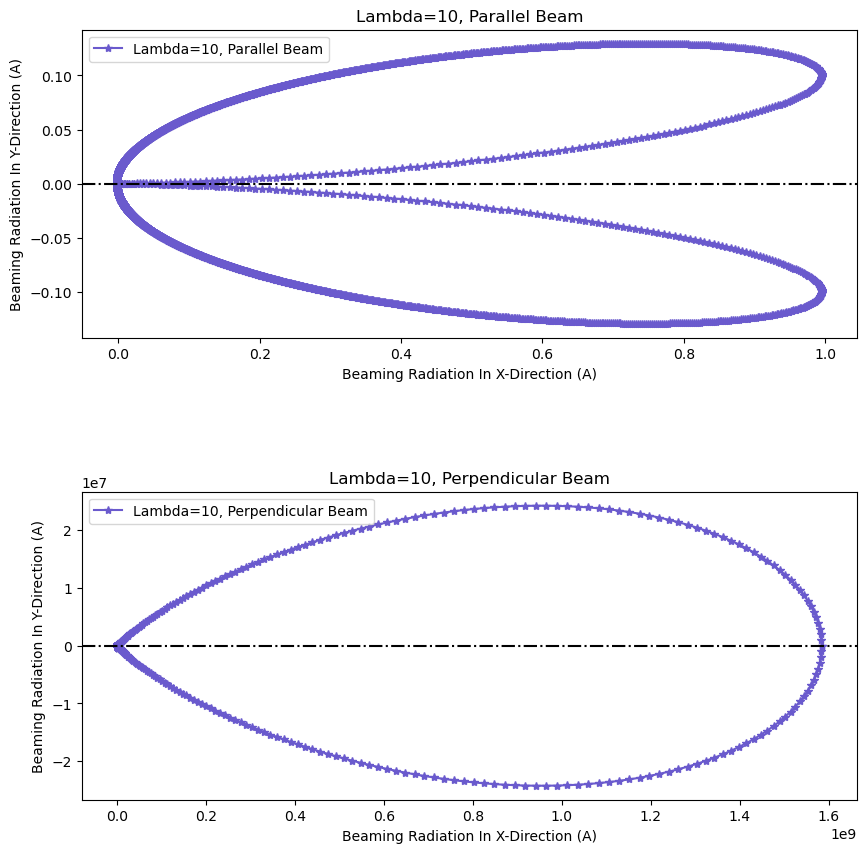

In [568]:
# -- Set up subplots -- 
fig = plt.figure(figsize=(10, 10))
gs = fig.add_gridspec(2,1, hspace=0.5)
axs = gs.subplots(sharex=False, sharey=False)
# --Plot in the Grids --
## -- Parallel beam plotting
axs[0].plot(np.cos(theta_list)*result[2], np.sin(theta_list)*result[2], marker="*", ls='-',c= 'slateblue', label='Lambda=10, Parallel Beam')
axs[0].set_xlabel('Beaming Radiation In X-Direction (A)')
axs[0].set_ylabel('Beaming Radiation In Y-Direction (A)')
axs[0].set_title('Lambda=10, Parallel Beam')
axs[0].axhline(y=0, color='k', linestyle='-.')
axs[0].legend()
    
## -- Perpendicualar beam plotting
axs[1].plot(np.cos(theta_list)*result[3], np.sin(theta_list)*result[3], marker="*", ls='-',c= 'slateblue', label='Lambda=10, Perpendicular Beam')
axs[1].set_xlabel('Beaming Radiation In X-Direction (A)')
axs[1].set_ylabel('Beaming Radiation In Y-Direction (A)')
axs[1].set_title('Lambda=10, Perpendicular Beam')
axs[1].axhline(y=0, color='k', linestyle='-.')
axs[1].legend()

plt.savefig('Lambda = 10, Beam.pdf', bbox='tight')



## Plot Lambda = 100, Beam Parallel and Perpendicular

/var/folders/hb/2k3dc2q970j6kglh41009phr0000gn/T/ipykernel_29027/24622056.py:23: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('Lambda = 100, Beam.pdf', bbox='tight')


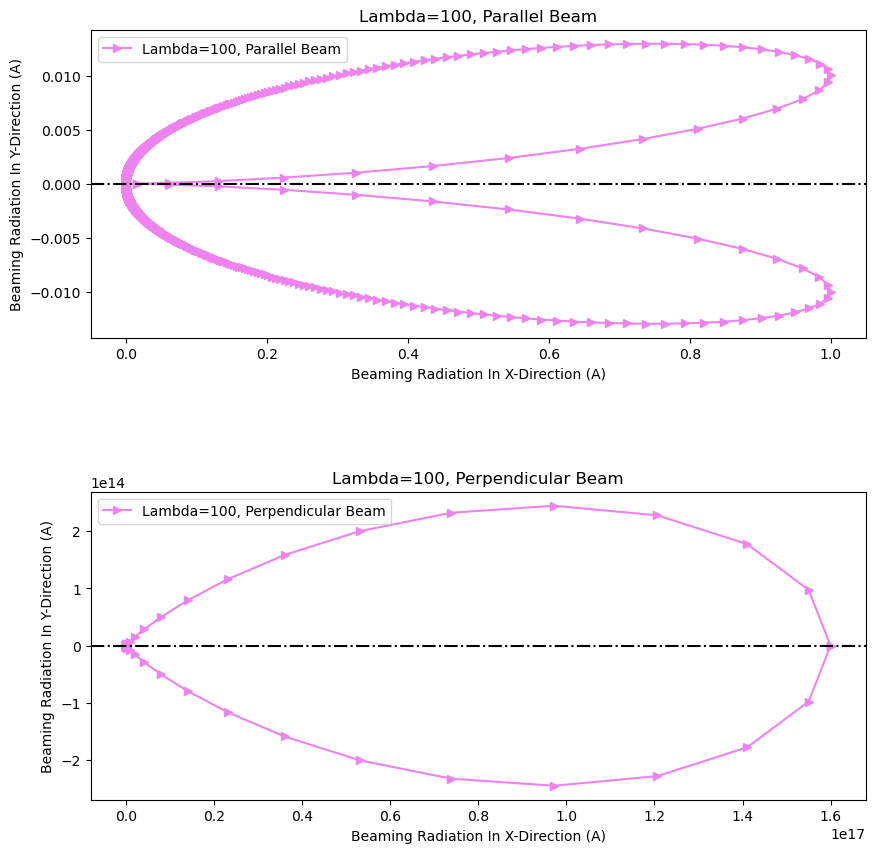

In [569]:
# -- Set up subplots -- 
fig = plt.figure(figsize=(10, 10))
gs = fig.add_gridspec(2,1, hspace=0.5)
axs = gs.subplots(sharex=False, sharey=False)

# --Plot in the Grids --
## -- Parallel beam plotting
axs[0].plot(np.cos(theta_list)*result[4], np.sin(theta_list)*result[4], marker=">", ls='-',c= 'violet', label='Lambda=100, Parallel Beam')
axs[0].set_xlabel('Beaming Radiation In X-Direction (A)')
axs[0].set_ylabel('Beaming Radiation In Y-Direction (A)')
axs[0].set_title('Lambda=100, Parallel Beam')
axs[0].axhline(y=0, color='k', linestyle='-.')
axs[0].legend()
    
## -- Perpendicualar beam plotting
axs[1].plot(np.cos(theta_list)*result[5], np.sin(theta_list)*result[5], marker=">", ls='-',c= 'violet', label='Lambda=100, Perpendicular Beam')
axs[1].set_xlabel('Beaming Radiation In X-Direction (A)')
axs[1].set_ylabel('Beaming Radiation In Y-Direction (A)')
axs[1].set_title('Lambda=100, Perpendicular Beam')
axs[1].axhline(y=0, color='k', linestyle='-.')
axs[1].legend()

plt.savefig('Lambda = 100, Beam.pdf', bbox='tight')



## Power Analysis

### See overleaf pdf question 3 for the comparision